# 8. Cointegración

Ahora nos concentraremos en vectores de procesos estocásticos no estacionarios. Sea el siguiente modelo VAR(p):

$$\mathbf{y}_t = \mathbf{\alpha} + \mathbf{\Phi}_1 \mathbf{y}_{t - 1} + \mathbf{\Phi}_2 \mathbf{y}_{t - 2} + \dots + \mathbf{\Phi}_p \mathbf{y}_{t - p} + \mathbf{\epsilon}_t$$

Este modelo puede reescribirse como:

$$\mathbf{y}_t = \mathbf{\zeta}_1 \mathbf{\Delta y_{t - 1}} + \mathbf{\zeta}_2 \mathbf{\Delta y_{t - 2}} + \dots + \mathbf{\zeta}_{p - 1} \mathbf{\Delta y_{t - p + 1}} + \mathbf{\alpha} + \mathbf{\rho y_{t - 1}} + \mathbf{\epsilon}_t$$

Si se cumple que:

$$\mathbf{\rho} = \mathbf{I}_n$$

que equivale a:

$$\mathbf{\Phi_1 + \Phi_2 + \dots + \Phi_p} = I_n$$

Esto implicaría la existencia de al menos una raiz unitaria ya que:

$$det(\mathbf{I_n - \Phi_1 - \Phi_2 - \dots - \Phi_p}) = 0$$

Por lo tanto el VAR(p) es I(1) y no es estacionario. En cambio el modelo VAR(p-1) en diferencias si lo sería:

$$\mathbf{\Delta y_t} = \mathbf{\zeta}_1 \mathbf{\Delta y_{t - 1}} + \mathbf{\zeta}_2 \mathbf{\Delta y_{t - 2}} + \dots + \mathbf{\zeta}_{p - 1} \mathbf{\Delta y_{t - p + 1}} + \mathbf{\alpha} + \mathbf{\epsilon}_t$$

Entonces volvemos a la dicotomía de estimar el VAR en niveles o diferencias considerando que es probable que el VAR no sea estacionario. Afortunadamente, como lo expone Hamilton(1994) aun en el caso que el VAR no sea estacionario las estimaciones por MCO siguen siendo consistentes y pueden aplicarse las usuales pruebas t y F. Sin embargo, hay que tener cuidado con la prueba de Granger ya que si el VAR no es estacionario el estadístico de esta prueba no converge a una $\chi^2$ por lo que puede darse situaciones que acepte la hipótesis de causalidad cuando no existe una relación causal en el sentido de Granger entre variables.

### 8.1 Regresiones espúreas

Imaginemos que tenemos un vector de variables I(1) de tamaño $n$ $\mathbf{y}_t$ y queremos obtener la relación lineal entre el primer componente de este vector $y_t$ y las restantes variables que denominamos $\mathbf{x}_t$. Optamos por una relación lineal de la forma:

$$y_t = \mathbf{x}'_t \mathbf{\beta} + u_t$$

¿Cuál es el problema al efectuar esta regresión? Si no existe una relación de cointegración (veremos más adelante la definición) entre las variables consideradas; entonces los estimadores por OLS no son consistentes y los estadísticos t y F no convergen a ninguna distribución límite. En realidad divergen a medida que aumentamos el tamaño de la muestra y es casi seguro encontrar resultados donde los coeficientes de la regresión son significativos. Ilustremos esto.

Sean los siguientes procesos camino aleatorio con constante:

$$y_t = 0.4 + y_{t - 1} + \epsilon_t$$
$$x_t = 0.6 + x_{t - 1} + \nu_t$$

In [110]:
set.seed(12345)
epsilon <- rnorm(500); nu <- rnorm(500, mean = 0, sd = 1.5)
y <- rep(0, 500); x <- rep(0, 500)
y[1] <- 1; x[1] <- 500
for (i in 2:500) {
    y[i] <- 0.4 + y[i - 1] + epsilon[i]
    x[i] <- 0.6 + x[i - 1] + nu[i]
}

In [111]:
datos <- data.frame(y = y[401:500], x = x[401:500])

In [112]:
ols_mod <- lm(y ~ x, data = datos)

In [113]:
summary(ols_mod)


Call:
lm(formula = y ~ x, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.907  -8.456  -1.436   9.050  16.623 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -453.85614   70.93469  -6.398 5.40e-09 ***
x              0.86234    0.08983   9.600 8.94e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.142 on 98 degrees of freedom
Multiple R-squared:  0.4846,	Adjusted R-squared:  0.4794 
F-statistic: 92.16 on 1 and 98 DF,  p-value: 8.945e-16


### 8.3 Descomposición de Beveridge - Nelson

Sea el proceso vectorial de media 0 $\mathbf{u}_t$ donde:

$$\mathbf{u}_t = \sum^\infty_{j = 0}\mathbf{\Psi}_j \mathbf{\epsilon}_{t - j} = \mathbf{\Psi}(L)\mathbf{\epsilon}_t$$

donde $\epsilon_t$ es un proceso vectorial ruido blanco. Si se cumplen las siguientes condiciones:

1. $\sum^\infty_{s = 0}s|\psi^{(s)}_{ij}| < \infty$. Esta condición es más fuerte que la condición de sumabilidad absoluta $\sum^\infty_{s = 0}|\psi_{ij}| < \infty$.
2. $\mathbf{\Psi}(1) = \mathbf{\Psi}_0 + \mathbf{\Psi}_1 + \dots \neq \mathbf{0}$

Entonces se cumple que:

$$\sum^t_{s = 1}\mathbf{u}_s = \mathbf{\Psi}(1)\sum^t_{s = 1} \mathbf{\epsilon}_s + \mathbf{\eta}_t - \mathbf{\eta}_0$$ 

Esta sería la descomposición de Beveridge-Nelson donde: $\mathbf{\Psi}(1)\sum^t_{s = 1} \mathbf{\epsilon}_s$ sería la tendencia estocástica y  $\mathbf{\eta}_t$ es un componente transitorio. 

Consideremos que $\mathbf{y}_t$ sigue un proceso I(1) entonces:

$$\mathbf{\Delta y_t} = \mathbf{\delta} + \mathbf{u}_t$$

Lo que equivale a:

$$\mathbf{y}_t = \mathbf{y}_0 + \mathbf{\delta}t + \sum^t_{s = 1}\mathbf{u}_s$$

Entonces tendríamos que:

$$\mathbf{y}_t =  \mathbf{\delta}t + \mathbf{\Psi}(1)\sum^t_{s = 1} \mathbf{\epsilon}_s +  \mathbf{\eta}_t +(\mathbf{y}_0 - \mathbf{\eta}_0)$$

### 8.4 Cointegración

Hemos visto que todo proceso vectorial I(1) puede descomponerse en una tendencia determinística, una tendencia estochástica y un componente estacionario; entonces, ¿es posible que alguna combinación lineal de las variables que conforman el vector $\mathbf{y}_t$ tal que se elimine la tendencia estocástica y la tendencia determinística?

Llamemos a ese vector $\mathbf{a}$, que cumple con las siguientes características:

1. $\mathbf{a}'\mathbf{\Psi}(1) = \mathbf{0}$.
2. $\mathbf{a}'\mathbf{\delta} = 0$.

Si $\mathbf{a}$ cumple estas características se dice que es un vector de cointegración. Puede darse el caso de que no cumpla 2. en ese caso se habla de cointegración estocástica.

El vector $\mathbf{a}$ no es necesariamente único. Pueden existir $h$ vectores de cointegración independientes para un proceso $\mathbf{y}_t$ I(1). Podemos juntarlos todos en una matriz $n \times h$; entonces $\mathbf{A}$ debe cumplir que :

1. $\mathbf{A}'\mathbf{\Psi}(1) = \mathbf{0}$.
2. $\mathbf{A}'\mathbf{\delta} = 0$.

Finalmente, los  $h$ vectores de cointegración constituyen una base que genera un espacio de vectores de cointegración lo que nos dice que toda combinación lineal de los vectores de cointegración de la matriz $\mathbf{A}$ es también un vector de cointegración. LLamemos $\mathbf{B}$ la matriz $n \times h$ donde $\mathbf{BA'}$ es tambien una matriz de vectores de cointegración que cumple con:

1. $\mathbf{BA'}\mathbf{\Psi}(1) = \mathbf{0}$.
2. $\mathbf{BA'}\mathbf{\delta} = 0$.

### 8.5 Implicancias de la cointegración en la representación VAR(p)

Puede verse en Hamilton(1994) que si existe una relación de cointegracion en el proceso vectorial $\mathbf{y}_t$ que es I(1) entonces no es aconsejable representar la dinámica del proceso a través de un VAR en diferencias; sin embargo, si es posible hacerlo en un VAR en niveles. Supangamos que $\mathbf{y}_t$ sigue un proceso VAR(p):

$$\mathbf{\Phi}(L)\mathbf{y}_t = \mathbf{\alpha} + \mathbf{\epsilon}_t$$

donde:

$$\mathbf{\Phi}(L) = \mathbf{I_n - \Phi L - \Phi_2 L^2 - \dots - \Phi_p L^p}$$

Supongamos que $\mathbf{\Delta y_t}$ tiene la representación de Wold:

$$(1 - L) \mathbf{y}_t = \mathbf{\delta} + \mathbf{\Psi}(L)\mathbf{\epsilon}_t$$

Esto nos lleva a concluir que:

$$(1 - L)\mathbf{\epsilon}_t = \mathbf{\Phi}(1)\mathbf{\delta} + \mathbf{\Phi}(L)\mathbf{\Psi}(L)\mathbf{\epsilon}_t$$

para que esto se cumpla para todos los valores posibles de $\mathbf{\epsilon}_t$ entonces es necesario que:

1. $\mathbf{\Phi}(1)\mathbf{\delta} = \mathbf{0}$

En segundo lugar, se tiene que:

$$(1 - z) \mathbf{I}_n = \mathbf{\Phi}(z)\mathbf{\Psi}(z)$$

para todos los valores $z$, en particular si escogemos $z = 1$, tenemos:

2. $\mathbf{\Phi}(1)\mathbf{\Psi}(1) = 0$

Lo que nos dice que al cumplir las condiciones 1 y 2 la matriz de coeficientes $\mathbf{\Phi}(1)$ es igual a todas las combinaciones lineales de vectores de cointegracion del proceso $\mathbf{y}_t$, es decir:

$$\mathbf{\Phi}(1) = \mathbf{BA'}$$

Entonces un proceso $\mathbf{y}_t$ cointegrado puede ser representado a través de un VAR en niveles.

### 8.6 Representación de Corrección de Errores

Hemos visto que el proceso $\mathbf{y}_t$ I(1) y cointegrado y posee tando una representación VMA($\infty$) en primeras diferencias como tambien una representación VAR(p). Adicionalmente gracias al **teorema de representación de Granger** este proceso tiene una representación VECM. 

Hemos visto que la representación VAR(p) puede expresarse como:

$$\mathbf{y}_t = \mathbf{\zeta}_1 \mathbf{\Delta y_{t - 1}} + \mathbf{\zeta}_2 \mathbf{\Delta y_{t - 2}} + \dots + \mathbf{\zeta}_{p - 1}\mathbf{\Delta y_{t - p + 1}} + \mathbf{\alpha} + \mathbf{\rho}\mathbf{y}_{t - 1} + \mathbf{\epsilon}_t$$

Restando a ambos lados $\mathbf{y}_{t - 1}$ tenemos:

$$\mathbf{y}_t = \mathbf{\zeta}_1 \mathbf{\Delta y_{t - 1}} + \mathbf{\zeta}_2 \mathbf{\Delta y_{t - 2}} + \dots + \mathbf{\zeta}_{p - 1}\mathbf{\Delta y_{t - p + 1}} + \mathbf{\alpha} - \mathbf{\Phi}(1)\mathbf{y}_{t - 1} + \mathbf{\epsilon}_t$$

Como existen $h$ relaciones de cointegración esto puede expresarse como:

$$\mathbf{y}_t = \mathbf{\zeta}_1 \mathbf{\Delta y_{t - 1}} + \mathbf{\zeta}_2 \mathbf{\Delta y_{t - 2}} + \dots + \mathbf{\zeta}_{p - 1}\mathbf{\Delta y_{t - p + 1}} + \mathbf{\alpha} - \mathbf{BA'}\mathbf{y}_{t - 1} + \mathbf{\epsilon}_t$$

Expresando $\mathbf{z}_{t - 1} = \mathbf{A'y_{t - 1}}$ que es estacionario tenemos la representación VECM:

$$\mathbf{y}_t = \mathbf{\zeta}_1 \mathbf{\Delta y_{t - 1}} + \mathbf{\zeta}_2 \mathbf{\Delta y_{t - 2}} + \dots + \mathbf{\zeta}_{p - 1}\mathbf{\Delta y_{t - p + 1}} + \mathbf{\alpha} - \mathbf{B}\mathbf{z}_{t - 1} + \mathbf{\epsilon}_t$$

donde $B$ es la matriz de ajuste de desviaciónes de largo plazo representadas por $\mathbf{z}_t$.

### 8.7 Pruebas de Cointegración

#### a) Prueba de Engle y Granger

Considerando la descomposición de Beveridge-Nelson y un vector de cointegración $\mathbf{a}$ tenemos:

$$\mathbf{a'}\mathbf{y}_t = \mu + z_t$$

donde $z_t$ es un proceso estacionario. Normalicemos el vector $\mathbf{a}$ de la siguiente forma:

$$\mathbf{a} = \left[\begin{array}{c} a_1 \\
                                      a_2 \\
                                      \vdots \\
                                      a_n \end{array}\right] = \left[\begin{array}{c} 1 \\
                                                                                      \gamma_1 \\
                                                                                      \vdots \\
                                                                                      \gamma_{n - 1}\end{array}\right]$$

Cabe recalcar que esta normalización es arbitraria. Se podría haber escogido cualquiera de los componentes del vector de cointegración $\mathbf{a}$ e igualarlo a 1. La relación de cointegración sería:

$$y_{1t} = \mu + \mathbf{\gamma}\mathbf{y}_{2t} + z_t$$

donde $\mathbf{y}_{2t}$ es el vector de variables restantes de $\mathbf{y}_t$. La prueba Engle y Granger tiene los siguientes pasos:

1. Estimar la ecuación descrita por MCO y obtener los residuos.
2. Efectuar una prueba de raíz unitaria a los residuos y verificar que no tengan raíz unitaria para que se verifique la cointegración.

La desventaja de esta prueba es que es sensible a la normalización del vector de cointegración.

#### b) Prueba de Phillips Ouliaris

Esta prueba es similar a la de Engle y Granger ya que parte de la misma regresión MCO. La ventaja de esta prueba es que Phillips & Ouliaris calculan la distribución asintótica del estadístico $ADF_t$ y además esta prueba es robusta ante diferentes normalizaciones del vector de cointegración.

#### c) Prueba de Johansen

La prueba de Johansen trata de determinar el número de vectores de cointegración presentes en la especificación de corrección de errores ya expuesta. Se concentra en determinar el rango de la matriz $\mathbf{Phi}(1) = \mathbf{BA'}$ que nos dará el número de vectores de cointegración del proceso. 

Esta prueba es robusta ante distintas normalizaciones del vector de cointegración.

Ilustremos esto con las series en logaritmos del PIB de Bolivia y del Consumo.

In [114]:
library(readxl)

In [116]:
setwd("..")

In [117]:
pib <- read_xlsx("./Datos/PIB2.xlsx", sheet = 1, range = "B11:AG11", col_names = FALSE)
cons <- read_xlsx("./Datos/PIB2.xlsx", sheet = 1, range = "B13:AG13", col_names = FALSE)

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...



In [118]:
Fecha <- seq(as.Date("01-01-1988", "%d-%m-%Y"), as.Date("01-01-2019", "%d-%m-%Y"), by = "year")

In [119]:
datos <- data.frame(Fecha = Fecha, C = t(log(cons)), Y = t(log(pib)))

In [121]:
library(ggplot2)

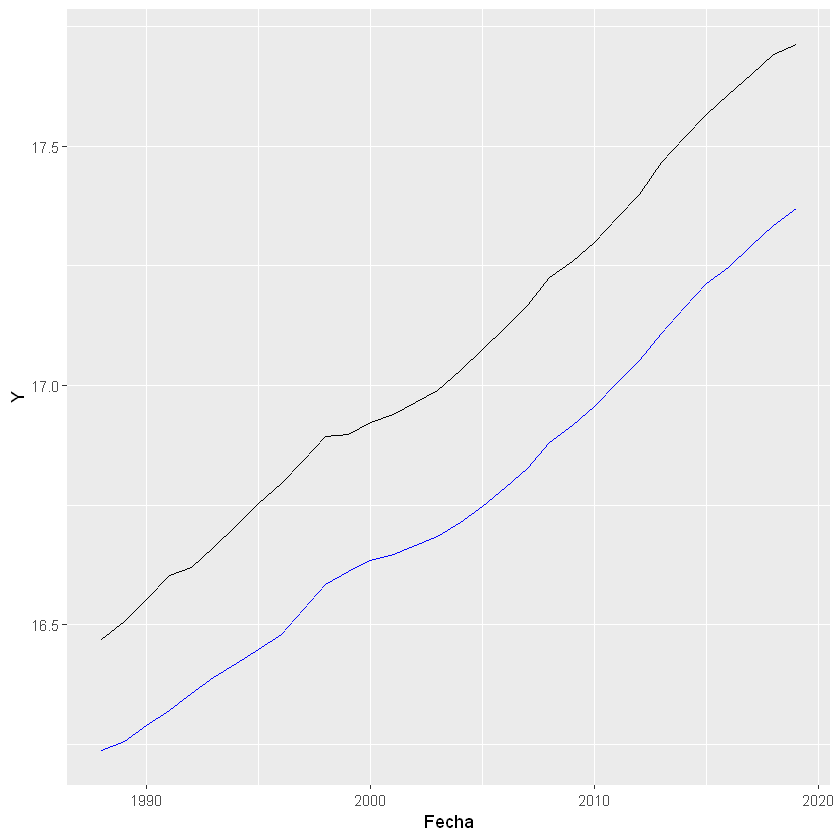

In [122]:
g <- ggplot(data = datos, aes(x = Fecha)) 
g + geom_line(aes(y = Y)) + geom_line(aes(y = C), colour = "blue")

In [123]:
library(urca)

El primer paso es verificar si ambas variables tienen raíces unitarias:

In [124]:
adf_pib <- ur.df(datos$Y, type = c("drift"), selectlags = c("BIC"))

In [125]:
summary(adf_pib)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.038405 -0.002342  0.002792  0.006560  0.021658 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.011692   0.122757  -0.095   0.9248  
z.lag.1      0.002220   0.007318   0.303   0.7640  
z.diff.lag   0.343589   0.194990   1.762   0.0894 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01318 on 27 degrees of freedom
Multiple R-squared:  0.1256,	Adjusted R-squared:  0.06082 
F-statistic: 1.939 on 2 and 27 DF,  p-value: 0.1633


Value of test-statistic is: 0.3033 5.1987 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94


In [126]:
adf_c <- ur.df(datos$C, type = c("drift"), selectlags = c("BIC"))

In [127]:
summary(adf_c)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0169498 -0.0043015  0.0001801  0.0043424  0.0193240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.059772   0.101909  -0.587  0.56240   
z.lag.1      0.004621   0.006271   0.737  0.46751   
z.diff.lag   0.533764   0.167771   3.182  0.00367 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.009126 on 27 degrees of freedom
Multiple R-squared:  0.4069,	Adjusted R-squared:  0.363 
F-statistic: 9.263 on 2 and 27 DF,  p-value: 0.000865


Value of test-statistic is: 0.7369 4.1971 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94


In [128]:
gls_pib <- ur.ers(datos$Y, type = "DF-GLS", model = "constant", lag.max = 1)

In [129]:
summary(gls_pib)


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.041765 -0.001116  0.003977  0.009534  0.025974 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
yd.lag       -0.001748   0.008329   -0.21    0.835    
yd.diff.lag1  0.936782   0.072909   12.85 2.92e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01522 on 28 degrees of freedom
Multiple R-squared:  0.8794,	Adjusted R-squared:  0.8708 
F-statistic: 102.1 on 2 and 28 DF,  p-value: 1.376e-13


Value of test-statistic is: -0.2098 

Critical values of DF-GLS are:
                 1pct  5pct 10pct
critical values -2.64 -1.95 -1.62


In [130]:
gls_c <- ur.ers(datos$C, type = "DF-GLS", model = "constant", lag.max = 1)

In [131]:
summary(gls_c)


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023607 -0.003343 -0.000123  0.007799  0.020577 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
yd.lag       -0.002989   0.006354   -0.47    0.642    
yd.diff.lag1  0.990321   0.055614   17.81   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01022 on 28 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9307 
F-statistic: 202.4 on 2 and 28 DF,  p-value: < 2.2e-16


Value of test-statistic is: -0.4704 

Critical values of DF-GLS are:
                 1pct  5pct 10pct
critical values -2.64 -1.95 -1.62


Entonces el logaritmo del PIB y Consumo en Bolivia son procesos I(1).

Efectuamos la prueba de Engle y Granger:

In [133]:
ols_mod <- lm(C ~ Y, data = datos)

In [134]:
summary(ols_mod)


Call:
lm(formula = C ~ Y, data = datos)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025112 -0.009947 -0.002799  0.009760  0.030947 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.182971   0.113240   10.45 1.64e-11 ***
Y           0.912238   0.006632  137.55  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01382 on 30 degrees of freedom
Multiple R-squared:  0.9984,	Adjusted R-squared:  0.9984 
F-statistic: 1.892e+04 on 1 and 30 DF,  p-value: < 2.2e-16


In [136]:
datos$res <- ols_mod$residuals

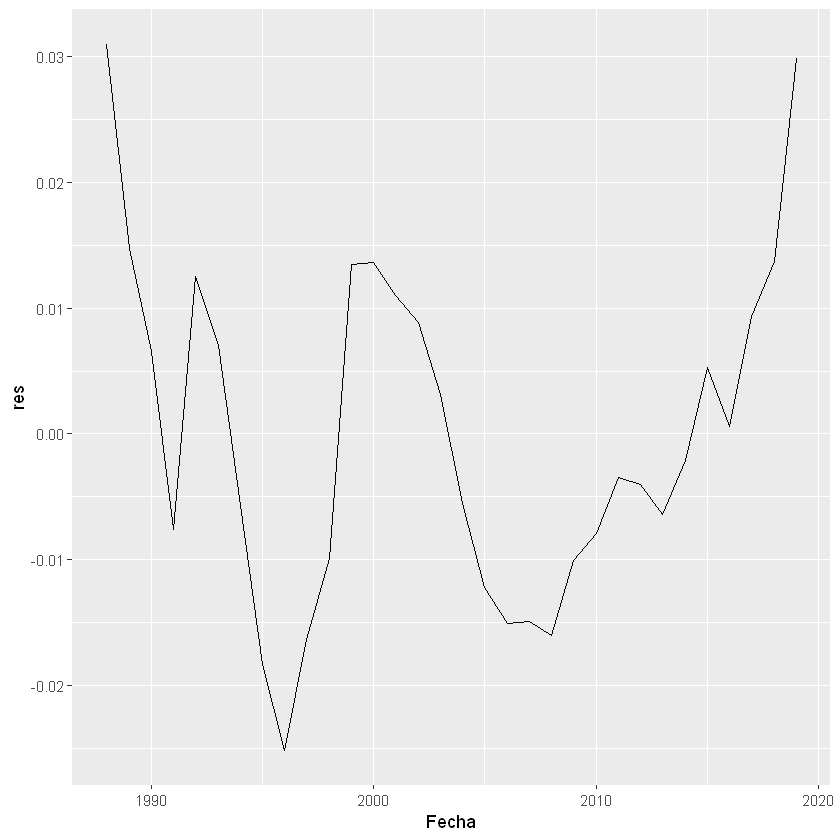

In [137]:
g <- ggplot(data = datos, aes(x = Fecha, y = res))
g + geom_line()

In [140]:
adf_res <- ur.df(datos$res, type = c("none"), selectlags = c("BIC"))

In [141]:
summary(adf_res)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.010244 -0.005499 -0.002594  0.002857  0.022359 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)  
z.lag.1     -0.2925     0.1404  -2.083   0.0465 *
z.diff.lag   0.3206     0.1779   1.802   0.0824 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.008432 on 28 degrees of freedom
Multiple R-squared:  0.1764,	Adjusted R-squared:  0.1176 
F-statistic: 2.999 on 2 and 28 DF,  p-value: 0.06604


Value of test-statistic is: -2.0828 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61


Hay evidencia que las series están cointegradas.

Efectuamos la prueba de Phillips Ouliaris:

In [154]:
coin_po <- ca.po(as.matrix(datos[,2:3]), demean = "none", lag = "short", type = "Pz")

In [155]:
summary(coin_po)


######################################## 
# Phillips and Ouliaris Unit Root Test # 
######################################## 

Test of type Pz 
detrending of series none 

Response C :

Call:
lm(formula = C ~ zr - 1)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0178205 -0.0064427 -0.0005024  0.0072918  0.0153025 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
zrC  0.75296    0.05474  13.756 3.06e-14 ***
zrY  0.24463    0.05373   4.553 8.76e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.008891 on 29 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 5.518e+07 on 2 and 29 DF,  p-value: < 2.2e-16


Response Y :

Call:
lm(formula = Y ~ zr - 1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.035251 -0.006833  0.003159  0.008263  0.022348 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
zrC -0.09251    0.08129  -1.138    0.264    


Se acepta la hipótesis nula de no cointegración.

Finalmente aplicamos la prueba de Johansen:

In [156]:
library(vars)

In [157]:
var_lag <- VARselect(y = as.matrix(datos[, 2:3]), lag.max = 10, type = "const")

In [158]:
var_lag$criteria

,1,2,3,4,5,6,7,8,9,10
AIC(n),-1.931986e+01,-1.931244e+01,-1.913586e+01,-1.895011e+01,-1.870131e+01,-1.863321e+01,-1.900342e+01,-1.932531e+01,-1.921044e+01,-5.589077e+01
HQ(n),-1.924976e+01,-1.919561e+01,-1.897230e+01,-1.873983e+01,-1.844430e+01,-1.832947e+01,-1.865294e+01,-1.892810e+01,-1.876650e+01,-5.540010e+01
SC(n),-1.902230e+01,-1.881651e+01,-1.844156e+01,-1.805744e+01,-1.761027e+01,-1.734380e+01,-1.751563e+01,-1.763915e+01,-1.732591e+01,-5.380787e+01
FPE(n),4.082991e-09,4.166122e-09,5.120103e-09,6.519941e-09,9.199749e-09,1.150364e-08,1.020206e-08,1.119311e-08,2.679470e-08,2.166047e-23


In [163]:
coint_jo <- ca.jo(as.matrix(datos[, 2:3]), type = "eigen", ecdet = "none", K = 2, spec = "transitory")

In [164]:
summary(coint_jo)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 2.727299e-01 8.266348e-05

Values of teststatistic and critical values of test:

         test 10pct  5pct  1pct
r <= 1 | 0.00  6.50  8.18 11.65
r = 0  | 9.55 12.91 14.90 19.19

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           C.l1       Y.l1
C.l1  1.0000000  1.0000000
Y.l1 -0.9360542 -0.8614138

Weights W:
(This is the loading matrix)

          C.l1         Y.l1
C.d -0.3907057 -0.001794949
Y.d -0.2203887 -0.005717280


In [165]:
coint_jo2 <- ca.jo(as.matrix(datos[, 2:3]), type = "trace", ecdet = "none", K = 2, spec = "transitory")

In [166]:
summary(coint_jo2)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 2.727299e-01 8.266348e-05

Values of teststatistic and critical values of test:

         test 10pct  5pct  1pct
r <= 1 | 0.00  6.50  8.18 11.65
r = 0  | 9.56 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           C.l1       Y.l1
C.l1  1.0000000  1.0000000
Y.l1 -0.9360542 -0.8614138

Weights W:
(This is the loading matrix)

          C.l1         Y.l1
C.d -0.3907057 -0.001794949
Y.d -0.2203887 -0.005717280


### 8.8 Caso de Estudio: Relación entre tasas de interés de corto y largo plazo

En los mercados financieros muchas veces se ve que movimientos en las tasas de corto plazo (por ejemplo una subida de la tasa de fondos federales de la reserva federal de Estados Unidos) se traduce en movimientos en la tasa de largo plazo. Muchos argumentan que las tasas de largo plazo son función de las tasas de corto plazo y de las expectativas sobre las tasas de corto plazo futuras. Verificaremos si esta relación es estable para el caso del TBill a 3 meses y el Bono a 1 año del Tesoro Americano y si un modelo VECM nos ayuda a pronosticar la Tasa del Bono a 1 año para todo el 2012.

In [167]:
if (!file.exists("./Datos/tasas.xls")) {
    url <- "http://time-series.net/yahoo_site_admin/assets/docs/quarterly.7775706.xls"
    download.file(url, destfile = "./Datos/tasas.xls", mode = "wb")
}

In [168]:
datos <- read_xls("./Datos/tasas.xls", sheet = 1, range = "A1:D213")

In [169]:
head(datos)

DATE,FFR,Tbill,Tb1yr
<chr>,<dbl>,<dbl>,<dbl>
1960Q1,3.93,3.87,4.57
1960Q2,3.70,2.99,3.87
1960Q3,2.94,2.36,3.07
1960Q4,2.30,2.31,2.99
1961Q1,2.00,2.35,2.87
1961Q2,1.73,2.30,2.94


In [170]:
tail(datos)

DATE,FFR,Tbill,Tb1yr
<chr>,<dbl>,<dbl>,<dbl>
2011Q3,0.08,0.02,0.13
2011Q4,0.07,0.01,0.11
2012Q1,0.10,0.07,0.16
2012Q2,0.15,0.09,0.19
2012Q3,0.14,0.10,0.18
2012Q4,0.16,0.09,0.17


In [171]:
datos$Fecha <- seq(as.Date("01-01-1960", "%d-%m-%Y"), as.Date("01-12-2012", "%d-%m-%Y"), by = "quarter")

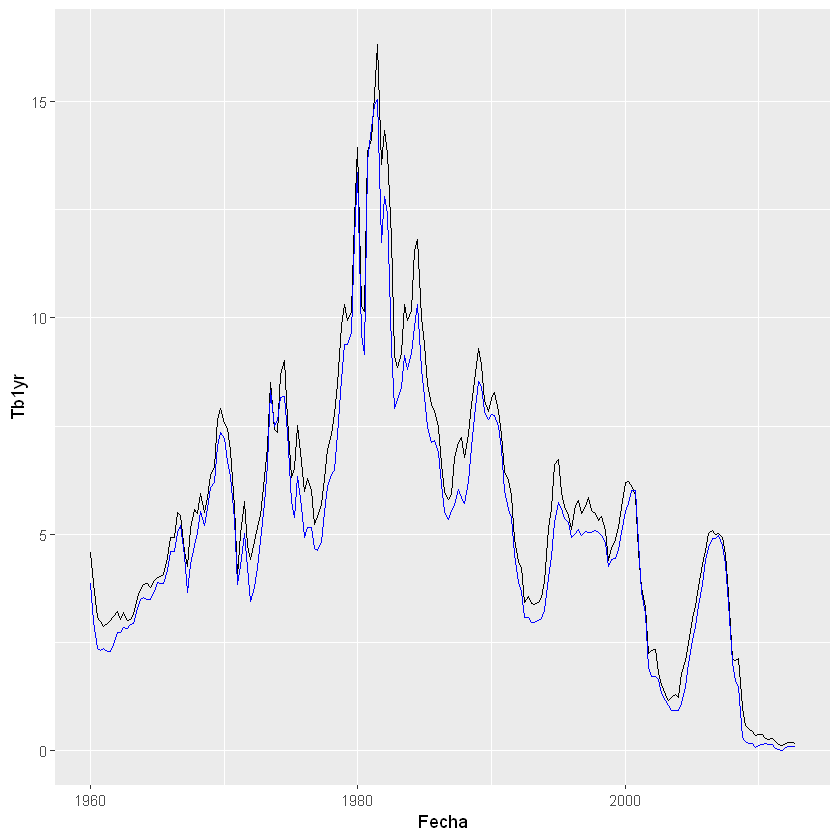

In [172]:
g <- ggplot(data = datos, aes(x = Fecha))
g + geom_line(aes(y = Tb1yr)) + geom_line(aes(y = Tbill), colour = "blue")

In [208]:
n <- nrow(datos)
datos_mod <- datos[1:(n - 3), ]

In [209]:
adf_Tb1 <- ur.df(datos_mod$Tb1yr, type = c("none"), selectlags = c("BIC"))

In [210]:
summary(adf_Tb1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8607 -0.2417  0.0615  0.3892  3.8185 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
z.lag.1    -0.008900   0.008021  -1.110  0.26844   
z.diff.lag  0.201619   0.068193   2.957  0.00348 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7476 on 205 degrees of freedom
Multiple R-squared:  0.04508,	Adjusted R-squared:  0.03576 
F-statistic: 4.838 on 2 and 205 DF,  p-value: 0.008848


Value of test-statistic is: -1.1097 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [211]:
gls_Tb1 <- ur.ers(datos_mod$Tb1yr, type = "DF-GLS", model = "constant", lag.max = 1)

In [212]:
summary(gls_Tb1)


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7354 -0.2611  0.0094  0.3506  3.8907 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
yd.lag       -0.02931    0.01590  -1.844  0.06664 . 
yd.diff.lag1  0.21512    0.06839   3.145  0.00191 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7437 on 205 degrees of freedom
Multiple R-squared:  0.05501,	Adjusted R-squared:  0.04579 
F-statistic: 5.967 on 2 and 205 DF,  p-value: 0.003028


Value of test-statistic is: -1.8439 

Critical values of DF-GLS are:
                 1pct  5pct 10pct
critical values -2.58 -1.94 -1.62


In [213]:
adf_Tb <- ur.df(datos_mod$Tbill, type = c("none"), selectlags = c("BIC"))

In [214]:
summary(adf_Tb)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9380 -0.1397  0.0584  0.3665  4.6625 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.010356   0.008647  -1.198 0.232427    
z.diff.lag  0.229296   0.067691   3.387 0.000846 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7349 on 205 degrees of freedom
Multiple R-squared:  0.05745,	Adjusted R-squared:  0.04825 
F-statistic: 6.248 on 2 and 205 DF,  p-value: 0.002324


Value of test-statistic is: -1.1977 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [215]:
gls_Tb <- ur.ers(datos_mod$Tbill, type = "DF-GLS", model = "constant", lag.max = 1)

In [216]:
summary(gls_Tb)


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7890 -0.1649  0.0144  0.3235  4.7444 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
yd.lag       -0.03304    0.01626  -2.031  0.04351 *  
yd.diff.lag1  0.24352    0.06778   3.593  0.00041 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7301 on 205 degrees of freedom
Multiple R-squared:  0.06958,	Adjusted R-squared:  0.06051 
F-statistic: 7.666 on 2 and 205 DF,  p-value: 0.0006159


Value of test-statistic is: -2.0313 

Critical values of DF-GLS are:
                 1pct  5pct 10pct
critical values -2.58 -1.94 -1.62


Concluimos que ambos procesos poseen raíz unitaria por lo que son I(1).

Efectuamos la prueba de Engle - Granger:

In [217]:
ols_mod <- lm(Tb1yr ~ Tbill, data = datos_mod)

In [218]:
summary(ols_mod)


Call:
lm(formula = Tb1yr ~ Tbill, data = datos_mod)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31683 -0.22666 -0.02933  0.22940  1.74287 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.28134    0.05081   5.538 9.24e-08 ***
Tbill        1.05320    0.00862 122.177  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3674 on 207 degrees of freedom
Multiple R-squared:  0.9863,	Adjusted R-squared:  0.9863 
F-statistic: 1.493e+04 on 1 and 207 DF,  p-value: < 2.2e-16


In [219]:
datos_mod$res <- ols_mod$residuals

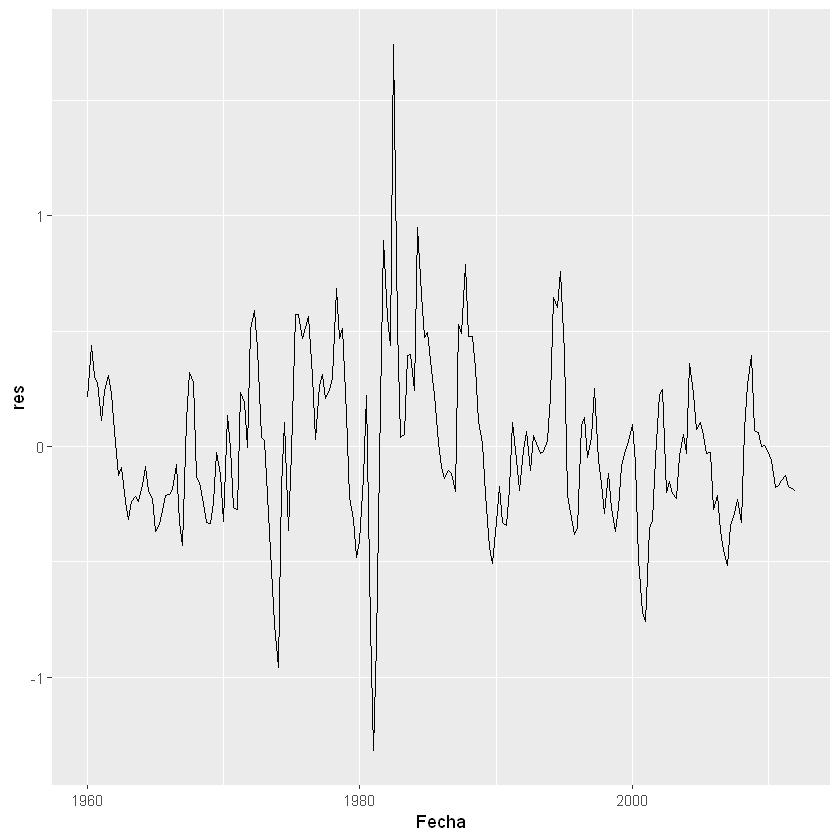

In [220]:
g <- ggplot(data = datos_mod, aes(x = Fecha, y = res))
g + geom_line()

In [221]:
adf_res <- ur.df(datos_mod$res, type = c("none"), selectlags = c("BIC"))

In [222]:
summary(adf_res)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98855 -0.13265 -0.03117  0.09674  1.47993 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.34721    0.05200  -6.678 2.23e-10 ***
z.diff.lag  0.19251    0.06832   2.818  0.00531 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2538 on 205 degrees of freedom
Multiple R-squared:  0.179,	Adjusted R-squared:  0.1709 
F-statistic: 22.34 on 2 and 205 DF,  p-value: 1.67e-09


Value of test-statistic is: -6.6777 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [223]:
gls_res <- ur.ers(datos_mod$res, type = "DF-GLS", model = "constant", lag.max = 1)

In [224]:
summary(gls_res)


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03720 -0.18395 -0.07720  0.04363  1.40139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
yd.lag       -0.28007    0.04802  -5.833  2.1e-08 ***
yd.diff.lag1  0.16007    0.06895   2.322   0.0212 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2594 on 205 degrees of freedom
Multiple R-squared:  0.1427,	Adjusted R-squared:  0.1343 
F-statistic: 17.06 on 2 and 205 DF,  p-value: 1.407e-07


Value of test-statistic is: -5.833 

Critical values of DF-GLS are:
                 1pct  5pct 10pct
critical values -2.58 -1.94 -1.62


Se rechaza la hipótesis nula de no cointegración. Existe una relación de largo plazo estable para la tasa de interés de corto plazo y la tasa de interés de largo plazo.

Aplicamos ahora la prueba PO:

In [225]:
po_test <- ca.po(as.matrix(datos_mod[, 3:4]), demean = "none", lag = "short", type = "Pz")

In [226]:
summary(po_test)


######################################## 
# Phillips and Ouliaris Unit Root Test # 
######################################## 

Test of type Pz 
detrending of series none 

Response Tbill :

Call:
lm(formula = Tbill ~ zr - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4801 -0.2136  0.0373  0.3653  4.5206 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
zrTbill   0.7863     0.1456   5.400 1.83e-07 ***
zrTb1yr   0.1869     0.1328   1.407    0.161    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.752 on 206 degrees of freedom
Multiple R-squared:  0.9839,	Adjusted R-squared:  0.9838 
F-statistic:  6303 on 2 and 206 DF,  p-value: < 2.2e-16


Response Tb1yr :

Call:
lm(formula = Tb1yr ~ zr - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5815 -0.2806  0.0530  0.3935  3.7874 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
zrTbill  0.06605    0.14765   0.447    0.655    
zrTb1yr  0.93178 

Se rechaza también la hipótesis nula de no cointegración.

Finalmente efectuamos el test de Johansen.

In [227]:
var_lag <- VARselect(y = as.matrix(datos_mod[, 3:4]), lag.max = 10, type = "const")

In [228]:
var_lag$criteria

,1,2,3,4,5,6,7,8,9,10
AIC(n),-3.25560632,-3.32647022,-3.3582362,-3.4381229,-3.4323193,-3.57931420,-3.60912869,-3.60025431,-3.63019502,-3.61884032
HQ(n),-3.21541881,-3.25949105,-3.2644653,-3.3175604,-3.2849651,-3.40516835,-3.40819117,-3.37252512,-3.37567416,-3.33752778
SC(n),-3.15631069,-3.16097752,-3.1265464,-3.1402361,-3.0682353,-3.14903317,-3.11265058,-3.03757911,-3.00132275,-2.92377096
FPE(n),0.03855761,0.03592043,0.0347986,0.0321289,0.0323192,0.02790522,0.02709095,0.02733959,0.02654197,0.02685608


In [229]:
coint_jo <- ca.jo(as.matrix(datos_mod[, 3:4]), type = "eigen", ecdet = "none", K = 6, spec = "longrun")

In [196]:
summary(coint_jo)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.152220749 0.006894654

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  1.42  6.50  8.18 11.65
r = 0  | 33.85 12.91 14.90 19.19

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           Tbill.l7 Tb1yr.l7
Tbill.l7  1.0000000  1.00000
Tb1yr.l7 -0.9065769 -1.15577

Weights W:
(This is the loading matrix)

          Tbill.l7   Tb1yr.l7
Tbill.d -0.8473504 0.05604857
Tb1yr.d -0.5073079 0.07324863


In [230]:
coint_jo2 <- ca.jo(as.matrix(datos_mod[, 3:4]), type = "trace", ecdet = "none", K = 6, spec = "longrun")

In [231]:
summary(coint_jo2)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.22588359 0.01432324

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  2.93  6.50  8.18 11.65
r = 0  | 54.90 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           Tbill.l6 Tb1yr.l6
Tbill.l6  1.0000000  1.00000
Tb1yr.l6 -0.9101234 -1.20833

Weights W:
(This is the loading matrix)

          Tbill.l6   Tb1yr.l6
Tbill.d -0.8843538 0.07214292
Tb1yr.d -0.4654971 0.09196772


In [232]:
vecm_mod <- cajorls(coint_jo, r = 1)

In [233]:
summary(vecm_mod$rlm)

Response Tbill.d :

Call:
lm(formula = Tbill.d ~ ect1 + constant + Tbill.dl1 + Tb1yr.dl1 + 
    Tbill.dl2 + Tb1yr.dl2 + Tbill.dl3 + Tb1yr.dl3 + Tbill.dl4 + 
    Tb1yr.dl4 + Tbill.dl5 + Tb1yr.dl5 - 1, data = data.mat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4892 -0.2162  0.0230  0.2859  3.0327 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
ect1      -0.8843538  0.1950388  -4.534 1.02e-05 ***
constant  -0.0398092  0.0465242  -0.856  0.39325    
Tbill.dl1 -0.0009675  0.1990537  -0.005  0.99613    
Tb1yr.dl1  0.3417479  0.1916837   1.783  0.07619 .  
Tbill.dl2 -0.5447489  0.1981885  -2.749  0.00656 ** 
Tb1yr.dl2  0.0972035  0.1916481   0.507  0.61260    
Tbill.dl3 -0.0371067  0.2130051  -0.174  0.86189    
Tb1yr.dl3  0.3796738  0.2052035   1.850  0.06582 .  
Tbill.dl4 -0.7879928  0.2194738  -3.590  0.00042 ***
Tb1yr.dl4  0.5861811  0.2123256   2.761  0.00633 ** 
Tbill.dl5 -0.2131579  0.2156034  -0.989  0.32408    
Tb1yr.dl5  0.4144907  0.2117265   1.95

In [247]:
library(tsDyn)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [250]:
vecm_mod2 <- VECM(datos_mod[, 3:4], lag = 6, r = 1, include = "const", estim = "2OLS", LRinclude = "none")

In [256]:
vecm_for <- predict(vecm_mod2, n.ahead = 4)

In [261]:
datos_for <- datos[(n - 3):n, c("Fecha", "Tb1yr")]

In [262]:
datos_for$Tb1_for <- vecm_for[, 2]

In [263]:
datos_for

Fecha,Tb1yr,Tb1_for
<date>,<dbl>,<dbl>
2012-01-01,0.16,0.2024376
2012-04-01,0.19,0.1910723
2012-07-01,0.18,0.2245458
2012-10-01,0.17,0.2830813


In [264]:
rmse <- sqrt(mean((datos_for$Tb1yr - datos_for$Tb1_for)^2))

In [265]:
rmse

[1] 0.06436965